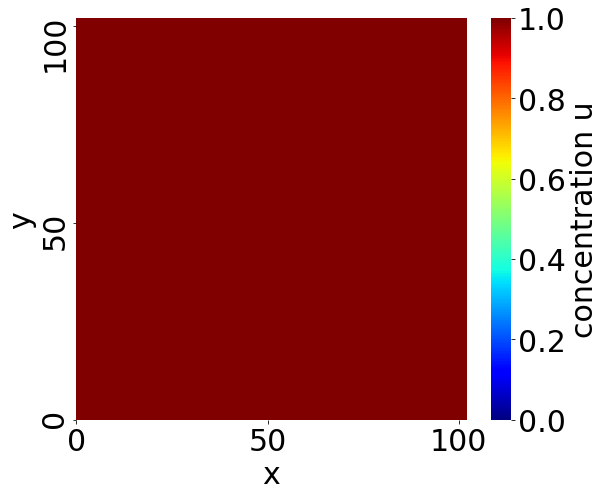

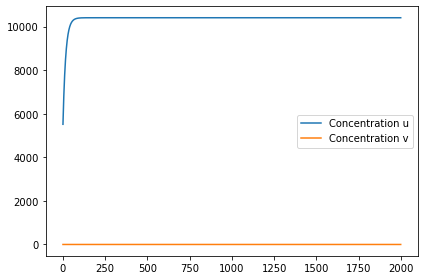

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class GrayScott:
    def __init__(self, n, Du, Dv, F, k):
        self.n = n
        self.Du = Du
        self.Dv = Dv
        self.F = F
        self.k = k
        self.u, self.v = self.init(n)
        self.utot,self.vtot = [],[]

    def init(self, n):
        u = np.ones((n + 2, n + 2)) * 0.5
        v = np.zeros((n + 2, n + 2))
        x, y = np.meshgrid(np.linspace(0, 1, n + 2), np.linspace(0, 1, n + 2))
        mask = ((0.45*n) < x) & (x < (0.55*n)) & ((0.45*n) < y) & (y < (0.55*n))
        v[mask] = 0.25
        return u, v

    def periodic_bc(self, u):
        u[0, :] = u[-2, :]
        u[-1, :] = u[1, :]
        u[:, 0] = u[:, -2]
        u[:, -1] = u[:, 1]

    def laplacian(self, u):
        return (u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2] - 4*u[1:-1, 1:-1])

    def numpy_grayscott(self, U, V, Du, Dv, F, k, dt):
        Lu = self.laplacian(U)
        Lv = self.laplacian(V)
        uvv = U[1:-1, 1:-1]*V[1:-1, 1:-1]*V[1:-1, 1:-1]
        U[1:-1, 1:-1] += dt*(Du*Lu - uvv + F*(1 - U[1:-1, 1:-1]))
        V[1:-1, 1:-1] += dt*(Dv*Lv + uvv - (F + k)*V[1:-1, 1:-1])
        self.periodic_bc(U)
        self.periodic_bc(V)
        return U, V
    
    def run(self, max_time, dt):
        self.u, self.v = self.init(self.n)

        for _ in np.arange(0, max_time, dt):
            self.u, self.v = self.numpy_grayscott(self.u, self.v, self.Du, self.Dv, self.F, self.k, dt)
            self.utot.append(np.sum(self.u))
            self.vtot.append(np.sum(self.v))

    def plot(self, max_time: float, dt: float, tickstep: float, savefig: bool):
    
        self.run(max_time, dt)

        plt.figure(figsize=(8.5, 7))
        ax = sns.heatmap(self.u, cmap='jet', vmin=0, vmax=1)
        ax.set_xlabel('x', fontsize=30)
        ax.set_ylabel('y', fontsize=30)
        ax.invert_yaxis()
        ax.tick_params(left=True, bottom=True)
        ax.set_xticks(range(0, self.n + tickstep, tickstep))
        ax.set_yticks(range(0, self.n + tickstep, tickstep))
        ax.set_xticklabels([f'{c}' for c in np.arange(0, self.n + tickstep, tickstep)], fontsize=30)
        ax.set_yticklabels([f'{c}' for c in np.arange(0, self.n + tickstep, tickstep)], fontsize=30)
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=30)
        cbar.set_label("concentration u", fontsize=30)

        plt.tight_layout()
        
        if savefig:
            plt.savefig(f"plots2/GS_2D_t={max_time}.png", dpi=300, bbox_inches='tight')

        plt.show()

        
    def plot_multiple(self, dt, plot_times, savefig):

        tickstep=50
        
        # create figure with subplots
        fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
        # fig.supxlabel('x', fontsize=35)
        # fig.supylabel('y', fontsize=35)

        # loop through plot times and generate heatmap for each time
        for i, t in enumerate(plot_times):
            row = i // 3  # calculate row index for current subplot
            col = i % 3   # calculate column index for current subplot
            self.run(t, dt)
            ax = sns.heatmap(self.u, vmin=0, vmax=1, cmap='jet', ax=axs[row, col], cbar=False)
            ax.set_title(f't = {t}')
            ax.tick_params(left=True, bottom=True)
            ax.invert_yaxis()
            ax.set_xticks(range(0, self.n + tickstep, tickstep))
            ax.set_yticks(range(0, self.n + tickstep, tickstep))
            ax.set_xticklabels(f'{c}' for c in np.arange(0, self.n + tickstep, tickstep))
            ax.set_yticklabels(f'{c}' for c in np.arange(0, self.n + tickstep, tickstep))

        # set x and y axis labels closer to the plot
        fig.text(0.5, -0.01, 'x', ha='center', va='center', fontsize=35)
        fig.text(-0.01, 0.5, 'y', ha='center', va='center', rotation='vertical', fontsize=35)

        fig.tight_layout()

        # add a colorbar
        cbar = fig.colorbar(ax.collections[0], ax=axs, location='right', label='concentration u')
        cbar.outline.set_visible(False)

        if savefig:
            plt.savefig(f"plots2/GS_multiple.png", dpi=300, bbox_inches='tight')

    def concentration(self,t):
        plt.plot(np.arange(0,t,1),self.utot,label='Concentration u')
        plt.plot(np.arange(0,t,1),self.vtot,label= 'Concentration v')
        plt.legend()
        plt.show()

t=2000
gs = GrayScott(n=100, Du=0.016, Dv=0.08, F=0.06, k=0.0609)
gs.plot(max_time=t, dt=1, tickstep=50, savefig=False)
gs.concentration(t)
#gs.plot_multiple(dt=1, plot_times=[1, 100, 200, 1000, 2000, 3000], savefig=True)